In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import sys; sys.path.insert(0,'..')
from main import *

In [3]:
X, y = load_svmlight_file('../data/phishing/phishing.txt')
X = X.toarray()

# Convert labels from {0, 1} to {-1, 1}
y = y * 2 - 1

In [4]:
svm_arr, tree_arr = data_size_experiment(X, y, rank=True, verbose=True)

Progress:
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.889		0.899
2	0.111		0.101
3	0.889		0.899
4	0.889		0.899
5	0.111		0.101
6	0.889		0.899
7	0.889		0.899
8	0.111		0.101
9	0.889		0.899
10	0.889		0.899
11	0.111		0.101
12	0.889		0.899
13	0.889		0.899
14	0.111		0.101
15	0.889		0.899
16	0.889		0.899
17	0.111		0.101
18	0.889		0.899
19	0.889		0.899
20	0.111		0.101
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.889		0.899
2	0.111		0.101
3	0.889		0.899
4	0.889		0.899
5	0.111		0.101
6	0.889		0.899
7	0.111		0.101
8	0.889		0.899
9	0.889		0.899
10	0.111		0.101
11	0.889		0.899
12	0.889		0.899
13	0.111		0.101
14	0.889		0.899
15	0.111		0.101
16	0.889		0.899
17	0.889		0.899
18	0.111		0.101
19	0.889		0.899
20	0.889		0.899
Done!
1
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.889		0.899
2	0.111		0.101
3	0.889		0.899
4	0.889		0.899
5	0.111		0.101
6	0.889		0.899
7	0.889		0.8

17	0.115		0.101
18	0.885		0.899
19	0.885		0.899
20	0.115		0.101
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.885		0.899
2	0.115		0.101
3	0.885		0.899
4	0.115		0.101
5	0.885		0.899
6	0.885		0.899
7	0.115		0.101
8	0.885		0.899
9	0.885		0.899
10	0.115		0.101
11	0.885		0.899
12	0.115		0.101
13	0.885		0.899
14	0.885		0.899
15	0.115		0.101
16	0.885		0.899
17	0.885		0.899
18	0.115		0.101
19	0.885		0.899
20	0.115		0.101
Done!
11
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.885		0.899
2	0.115		0.101
3	0.885		0.899
4	0.885		0.899
5	0.115		0.101
6	0.885		0.899
7	0.885		0.899
8	0.115		0.101
9	0.885		0.899
10	0.885		0.899
11	0.115		0.101
12	0.885		0.899
13	0.885		0.899
14	0.115		0.101
15	0.885		0.899
16	0.885		0.899
17	0.115		0.101
18	0.885		0.899
19	0.885		0.901
20	0.115		0.101
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.890		0.903
2	0.110		0.097
3	0.890	

9	0.884		0.876
10	0.884		0.876
11	0.881		0.850
12	0.884		0.857
13	0.879		0.856
14	0.874		0.854
15	0.879		0.858
16	0.874		0.835
17	0.874		0.848
18	0.850		0.817
19	0.877		0.834
20	0.853		0.801
Done!
21
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.907		0.902
2	0.877		0.860
3	0.854		0.852
4	0.511		0.506
5	0.900		0.910
6	0.810		0.797
7	0.849		0.854
8	0.549		0.558
9	0.856		0.864
10	0.867		0.874
11	0.840		0.849
12	0.527		0.515
13	0.833		0.845
14	0.893		0.901
15	0.900		0.907
16	0.403		0.381
17	0.851		0.882
18	0.919		0.926
19	0.871		0.878
20	0.770		0.779
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.906		0.892
2	0.099		0.113
3	0.914		0.912
4	0.093		0.108
5	0.913		0.910
6	0.913		0.910
7	0.911		0.910
8	0.911		0.910
9	0.911		0.910
10	0.911		0.910
11	0.911		0.910
12	0.911		0.910
13	0.911		0.910
14	0.911		0.910
15	0.900		0.901
16	0.899		0.903
17	0.897		0.896
18	0.911		0.895
19	0.899		0.900
20	0.909		0.880
Don

3	0.743		0.751
4	0.703		0.693
5	0.816		0.830
6	0.710		0.718
7	0.742		0.748
8	0.596		0.613
9	0.834		0.850
10	0.462		0.460
11	0.746		0.765
12	0.849		0.857
13	0.780		0.777
14	0.573		0.593
15	0.866		0.878
16	0.739		0.785
17	0.809		0.826
18	0.602		0.651
19	0.748		0.762
20	0.628		0.675
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.911		0.922
2	0.089		0.078
3	0.911		0.922
4	0.911		0.922
5	0.089		0.078
6	0.911		0.922
7	0.911		0.922
8	0.089		0.078
9	0.911		0.922
10	0.911		0.922
11	0.089		0.078
12	0.911		0.922
13	0.089		0.078
14	0.911		0.922
15	0.911		0.922
16	0.089		0.078
17	0.911		0.922
18	0.911		0.922
19	0.089		0.078
20	0.911		0.922
Done!
32
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.909		0.922
2	0.900		0.897
3	0.819		0.816
4	0.550		0.558
5	0.866		0.883
6	0.586		0.637
7	0.836		0.848
8	0.570		0.613
9	0.833		0.843
10	0.549		0.596
11	0.833		0.843
12	0.490		0.538
13	0.840		0.847
14	0.511		0.556
15	0.840	

16	0.846		0.835
17	0.785		0.781
18	0.833		0.843
19	0.916		0.921
20	0.658		0.665
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.916		0.918
2	0.084		0.082
3	0.917		0.920
4	0.917		0.920
5	0.917		0.920
6	0.917		0.920
7	0.917		0.920
8	0.917		0.920
9	0.917		0.920
10	0.917		0.920
11	0.917		0.920
12	0.917		0.920
13	0.917		0.920
14	0.913		0.911
15	0.915		0.913
16	0.909		0.905
17	0.917		0.906
18	0.915		0.898
19	0.915		0.901
20	0.914		0.895
Done!
42
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.919		0.927
2	0.922		0.918
3	0.615		0.647
4	0.705		0.719
5	0.894		0.902
6	0.748		0.766
7	0.833		0.823
8	0.822		0.842
9	0.907		0.911
10	0.635		0.635
11	0.837		0.860
12	0.854		0.869
13	0.898		0.907
14	0.664		0.664
15	0.750		0.780
16	0.833		0.844
17	0.909		0.900
18	0.702		0.697
19	0.677		0.694
20	0.789		0.811
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.915		0.922
2	0.085

4	0.921		0.926
5	0.079		0.074
6	0.921		0.926
7	0.921		0.926
8	0.079		0.074
9	0.921		0.926
10	0.921		0.926
11	0.079		0.074
12	0.921		0.926
13	0.079		0.074
14	0.921		0.926
15	0.921		0.926
16	0.079		0.074
17	0.921		0.926
18	0.921		0.926
19	0.079		0.074
20	0.921		0.926
Done!
52
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.914		0.924
2	0.928		0.918
3	0.888		0.899
4	0.183		0.182
5	0.888		0.899
6	0.622		0.629
7	0.883		0.895
8	0.895		0.888
9	0.788		0.802
10	0.752		0.732
11	0.906		0.919
12	0.641		0.635
13	0.851		0.866
14	0.892		0.872
15	0.902		0.916
16	0.412		0.392
17	0.862		0.879
18	0.922		0.926
19	0.818		0.831
20	0.705		0.723
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.915		0.926
2	0.086		0.076
3	0.915		0.926
4	0.086		0.076
5	0.915		0.926
6	0.086		0.076
7	0.915		0.926
8	0.085		0.075
9	0.914		0.924
10	0.914		0.925
11	0.085		0.078
12	0.915		0.924
13	0.915		0.925
14	0.914		0.925
15	0.912		0.916
16	0.088

14	0.923		0.912
15	0.929		0.921
16	0.921		0.912
17	0.923		0.917
18	0.918		0.916
19	0.925		0.920
20	0.929		0.926
Done!
62
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.914		0.924
2	0.931		0.935
3	0.914		0.927
4	0.923		0.924
5	0.906		0.921
6	0.540		0.551
7	0.809		0.833
8	0.880		0.877
9	0.910		0.919
10	0.909		0.917
11	0.900		0.913
12	0.395		0.401
13	0.883		0.899
14	0.726		0.755
15	0.654		0.668
16	0.716		0.741
17	0.903		0.910
18	0.884		0.892
19	0.830		0.851
20	0.594		0.609
Done!
DECISION TREE SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Train		Test
1	0.916		0.923
2	0.085		0.078
3	0.916		0.923
4	0.085		0.078
5	0.915		0.922
6	0.087		0.078
7	0.916		0.923
8	0.087		0.078
9	0.916		0.923
10	0.087		0.078
11	0.916		0.923
12	0.084		0.078
13	0.916		0.923
14	0.916		0.923
15	0.089		0.079
16	0.916		0.922
17	0.916		0.922
18	0.916		0.922
19	0.890		0.883
20	0.921		0.913
Done!
63
LINEAR SVM SUBMODELS
Using 20 classifiers and sample proportion of 2
t	Tr

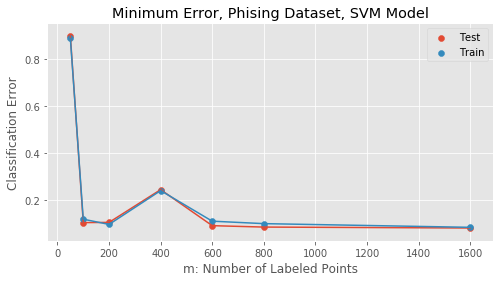

In [5]:
plot_err(svm_arr, 'Minimum Error, Phising', 'SVM', True, group='min')

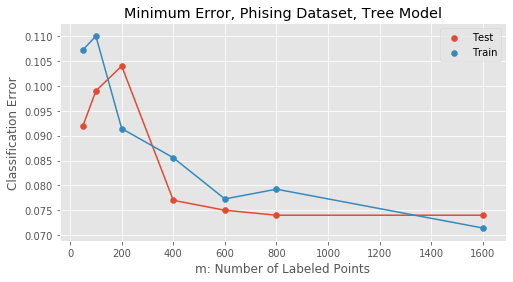

In [6]:
plot_err(tree_arr, 'Minimum Error, Phising', 'Tree', True, group='min')

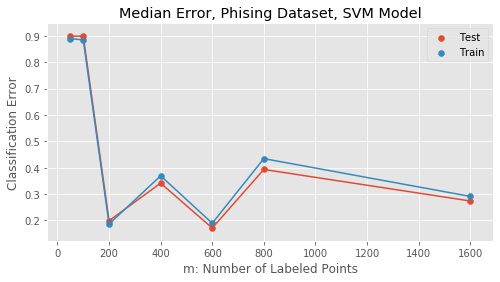

In [7]:
plot_err(svm_arr, 'Median Error, Phising', 'SVM', True, group='median')

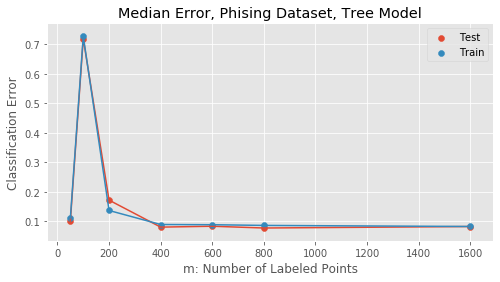

In [8]:
plot_err(tree_arr, 'Median Error, Phising', 'Tree', True, group='median')

# New

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# sample_size = 1000
# m = 500
# num_repeats = 10

# X_train = X_train[:sample_size]
# y_train = y_train[:sample_size]

# W = generate_rank_W(X_train, y_train, m)

# svm_arr  = np.full(shape=(num_repeats, 2), fill_value=np.NaN)
# tree_arr = np.full(shape=(num_repeats, 2), fill_value=np.NaN)

# for i in range(num_repeats):
#     svm_arr[i]  = svm_lambdaboost(X_train, y_train, X_test, y_test, W, T=25)
#     tree_arr[i] = tree_lambdaboost(X_train, y_train, X_test, y_test, W, T=25)